**1. zadatak (8 poena)**
<br>

U datoteci  *consumer-complaints.csv* se nalaze primedbe korisnika na račun usluga jedne banke. Cilj je napraviti klasifikator koji će na osnovu teksta primedbe moći da odredi na koju kategoriju usluga se primedba odnosi. 

Ukoliko datoteka nije dostupna, preuzmite je [odavde](https://www.kaggle.com/dushyantv/consumer_complaints).
<br>

a) Učitati podatke koji se nalaze u zadatoj datoteci, a potom izdvojiti podatke koji se nalaze u kolonama “Consumer complaint narrative” i “Product” i elminisati nedostajuće vrste.  Podaci  sadržani u koloni “Consumer complaint narrative” će se koristiti kao ulaz klasifikatora, a kategorije sadržane u koloni “Product” kao izlaz klasifikatora. Koliko ima različitih kategorija usluga? Prikazati histogram broja primedbi po kategorijama.
<br>

b) Podeliti skup podataka na trening i test skup u razmeri 2:1. Za $random\_state$ parametar uzeti vrednost 7.
<br>

c) Koristeći  TF-IDF vektorizaciju pripremiti tekstualne podatke za obradu. Ignorisati sve reči koje se pojavljuju manje od 5 puta i sve *stop* reči engleskog jezika. 
<br>

d) Izvršiti mapiranja izlaza klasifikatora u odgovarajuće numeričke kategorije.   
<br>
e) Koristeći linearni SVM klasifikator sa politikom "jedan protiv svih" naučiti višeklasni klasifikator.   
<br>
f) Dati ocenu tačnosti klasifikatora na test skupu. 
<br>

g) Kako se menja tačnost linearnog SVM klasifikatora ako se dodaju podešavanja koja su prilagođena nebalansiranom skupu podataka? 


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import LinearSVC

a) Učitati podatke koji se nalaze u zadatoj datoteci, a potom izdvojiti podatke koji se nalaze u kolonama “Consumer complaint narrative” i “Product” i elminisati nedostajuće vrste. Podaci sadržani u koloni “Consumer complaint narrative” će se koristiti kao ulaz klasifikatora, a kategorije sadržane u koloni “Product” kao izlaz klasifikatora. Koliko ima različitih kategorija usluga? Prikazati histogram broja primedbi po kategorijama. 

In [3]:
data = pd.read_csv('consumer_complaints.csv')

In [4]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,03/12/2014,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,03/17/2014,Closed with explanation,Yes,No,759217
1,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,NaN,Consent provided,Web,10/05/2016,Closed with explanation,Yes,No,2141773
2,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Older American,Consent provided,Web,10/20/2016,Closed with explanation,Yes,No,2163100
3,06/08/2014,Credit card,NaN,Bankruptcy,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Older American,NaN,Web,06/10/2014,Closed with explanation,Yes,Yes,885638
4,09/13/2014,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,"CITIBANK, N.A.",VA,23233,NaN,NaN,Web,09/13/2014,Closed with explanation,Yes,Yes,1027760


In [5]:
data = data[['Product', 'Consumer complaint narrative']]

In [6]:
data = data.dropna()

In [7]:
data.head()

,Product,Consumer complaint narrative
1,Credit reporting,I have outdated information on my credit repor...
2,Consumer Loan,I purchased a new car on XXXX XXXX. The car de...
7,Credit reporting,An account on my credit report has a mistaken ...
12,Debt collection,This company refuses to provide me verificatio...
16,Debt collection,This complaint is in regards to Square Two Fin...


In [8]:
len(np.unique(data['Product']))

18

In [9]:
x = data['Consumer complaint narrative']
y = data['Product']

In [10]:
y.value_counts()

Debt collection                                                                 66776
Credit reporting, credit repair services, or other personal consumer reports    54828
Mortgage                                                                        45208
Credit reporting                                                                31593
Credit card                                                                     18842
Student loan                                                                    17404
Bank account or service                                                         14887
Credit card or prepaid card                                                     12123
Consumer Loan                                                                    9474
Checking or savings account                                                      7326
Money transfer, virtual currency, or money service                               3504
Vehicle loan or lease                                 

d) Izvršiti mapiranja izlaza klasifikatora u odgovarajuće numeričke kategorije.

In [11]:
y = pd.Series(y, dtype='category')

In [12]:
y.cat.categories = range(0,18)

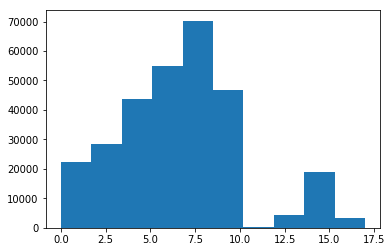

In [13]:
# Resenje za deo pod a) - prikaz histograma
plt.hist(y)
plt.show() 

b) Podeliti skup podataka na trening i test skup u razmeri 2:1. Za  random_state
  parametar uzeti vrednost 7. 

In [14]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y,test_size=0.33, random_state=7 ,stratify=y)

c) Koristeći TF-IDF vektorizaciju pripremiti tekstualne podatke za obradu. Ignorisati sve reči koje se pojavljuju manje od 5 puta i sve stop reči engleskog jezika. 

In [15]:
vect = TfidfVectorizer(stop_words='english', min_df=5)

In [16]:
vect.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [17]:
x_train = vect.transform(x_train)
x_test = vect.transform(x_test)

In [18]:
x_train.shape

(196043, 23054)

In [19]:
x_test.shape

(96559, 23054)

In [20]:
y_test.head(10)

927596     6
854487     7
330200     2
944514    13
169530    10
389959     7
368054     5
822788     7
628998    15
427197    10
Name: Product, dtype: category
Categories (18, int64): [0, 1, 2, 3, ..., 14, 15, 16, 17]

e) Koristeći linearni SVM klasifikator sa politikom "jedan protiv svih" naučiti višeklasni klasifikator.

In [21]:
model = LinearSVC(multi_class='ovr', loss='hinge')

In [22]:
model.fit(x_train, y_train)

/usr/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

f) Dati ocenu tačnosti klasifikatora na test skupu. 

In [23]:
metrics.accuracy_score(model.predict(x_test), y_test)

0.7280419225551218

g) Kako se menja tačnost linearnog SVM klasifikatora ako se dodaju podešavanja koja su prilagođena nebalansiranom skupu podataka?

In [24]:
model = LinearSVC(multi_class='ovr', class_weight='balanced', loss='hinge') 

In [25]:
model.fit(x_train, y_train)

/usr/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [26]:
metrics.accuracy_score(model.predict(x_test), y_test)

0.7073395540550337

Manja je tacnost, ali ne znacajno.